web scraping


In [3]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://scrapeme.live/shop/'  # pagina de práctica de WooCommerce

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print("Conexion pagina")
else:
    print(f"Error al conectar: {response.status_code}")
    exit()

soup = BeautifulSoup(response.content, 'html.parser')

productos = soup.find_all('li', class_='product')  #productos por clase
data = []

for producto in productos:
    nombre = producto.find('h2', class_='woocommerce-loop-product__title').text
    precio = producto.find('span', class_='woocommerce-Price-amount').text
    enlace = producto.find('a')['href']
    data.append({'Nombre': nombre, 'Precio': precio, 'Enlace': enlace})

df = pd.DataFrame(data)

df.to_csv('productos.csv', index=False)



Conexión exitosa a la página
Datos guardados en productos.csv


In [5]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://scrapeme.live/shop/'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response = requests.get(url, headers=headers)

if response.status_code != 200:
    print(f"Error al conectar: {response.status_code}")
    exit()

soup = BeautifulSoup(response.content, 'html.parser')

productos = soup.find_all('li', class_='product')
data = []

for producto in productos:
    nombre = producto.find('h2', class_='woocommerce-loop-product__title').text

    precio = producto.find('span', class_='woocommerce-Price-amount').text
    precio = float(precio.replace('£', '').replace('$', '').replace(',', ''))

    enlace = producto.find('a')['href']

    disponibilidad_tag = producto.find('span', class_='out-of-stock')
    disponibilidad = 'Agotado' if disponibilidad_tag else 'Disponible'

    data.append({
        'Nombre': nombre,
        'Precio': precio,
        'Enlace': enlace,
        'Disponibilidad': disponibilidad
    })

df = pd.DataFrame(data)

df.to_csv('productos_scrapeme.csv', index=False)




In [7]:
df = pd.DataFrame(data)

df = df.dropna()

#filas duplicadas

df = df.drop_duplicates()


df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce') # precio es numérico

df = df[df['Precio'].notna()]

df = df[df['Precio'] > 0] #borrar precio 0

df.to_csv('productos_scrapeme_limpio.csv', index=False)
print("Datos limpiados guardados en productos_scrapeme_limpio.csv")


Datos limpiados guardados en productos_scrapeme_limpio.csv


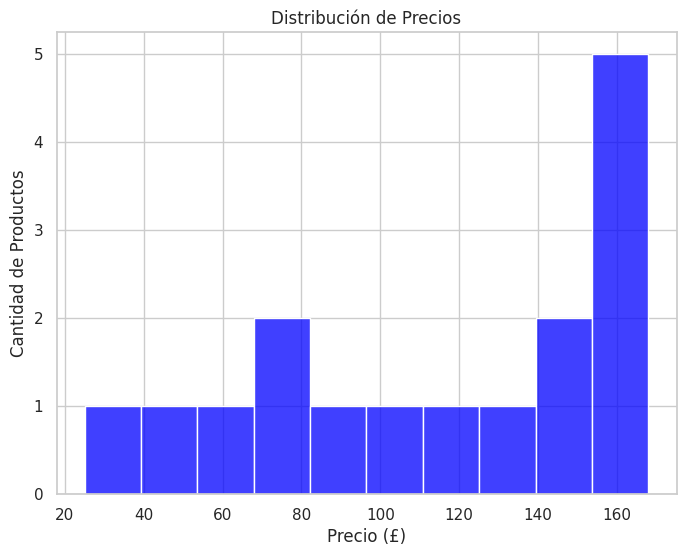

In [8]:

sns.set(style='whitegrid')

# Distribución de precios
plt.figure(figsize=(8, 6))
sns.histplot(df['Precio'], kde=False, color='blue', bins=10)
plt.title('Distribución de Precios')
plt.xlabel('Precio (£)')
plt.ylabel('Cantidad de Productos')
plt.show()

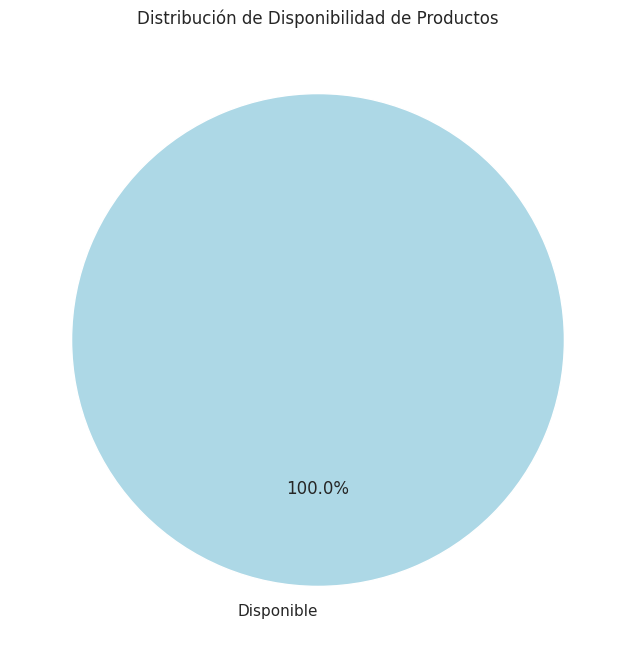

In [9]:
# disponibilidad
plt.figure(figsize=(8, 8))
df['Disponibilidad'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90)
plt.title('Distribución de Disponibilidad de Productos')
plt.ylabel('')
plt.show()


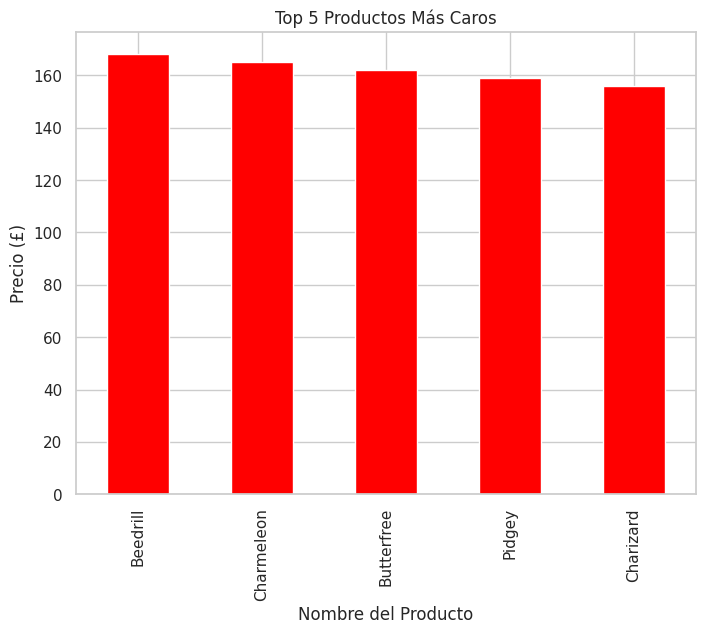

In [10]:
# Top 5 productos más caros
plt.figure(figsize=(8, 6))
df.nlargest(5, 'Precio').set_index('Nombre')['Precio'].plot(kind='bar', color='red')
plt.title('Top 5 Productos Más Caros')
plt.ylabel('Precio (£)')
plt.xlabel('Nombre del Producto')
plt.show()

<ipython-input-11-76191caaa2d0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rango de Precio', data=df, palette='viridis')


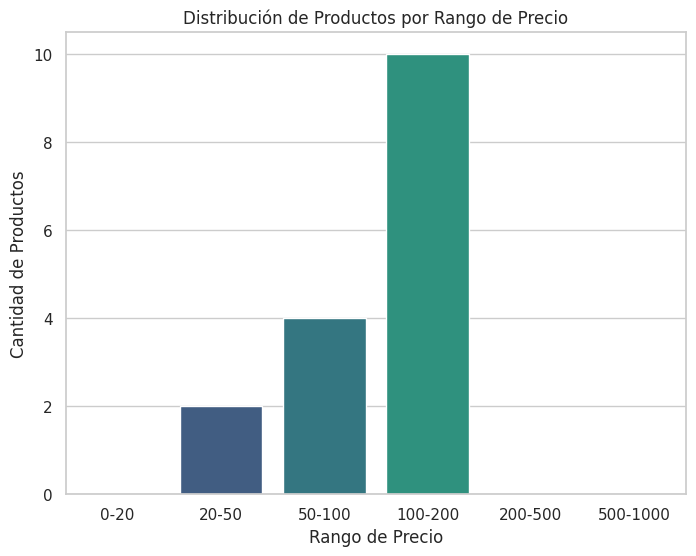

In [11]:
import seaborn as sns
bins = [0, 20, 50, 100, 200, 500, 1000]
labels = ['0-20', '20-50', '50-100', '100-200', '200-500', '500-1000']
df['Rango de Precio'] = pd.cut(df['Precio'], bins=bins, labels=labels, right=False)

# distribución de precios en rangos
plt.figure(figsize=(8, 6))
sns.countplot(x='Rango de Precio', data=df, palette='viridis')
plt.title('Distribución de Productos por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Cantidad de Productos')
plt.show()

La tienda de productos parece estar enfocada en productos con un rango de precio medio, ni muy altos ni muy bajos, con una concentración en el rango entre los 100 y los 200£.

Respecto a la disponbilidad, se ve un stock del 100%, lo que muestra o que la pagina tiene una buena gestión de los productos o que estos no tiene una alta demanda. O simplemente no muestra los productos que no están en stock.

Se ve una mayor cantidad en el rago de los 160, que podría ser algun precio estratégico competitivo o que maneja productos muy similares.
